In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## England COVID-19 death statistics
Takes the daily statistics from the NHS England website - https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-daily-deaths/


In [133]:
death_by_region_df = pd.read_excel(
    io="COVID-19-total-announced-deaths-1-June-2020.xlsx", 
    sheet_name="Tab1 Deaths by region",
    header=15,
)
death_by_region_df = death_by_region_df.drop(1)
death_by_region_df = death_by_region_df.dropna(axis=1)
death_by_region_df = death_by_region_df.drop(
    ["Up to 01-Mar-20", "Total", "Awaiting verification"], axis=1
)
death_by_region_df = death_by_region_df.T
death_by_region_df.columns = death_by_region_df.loc["NHS England Region"]
death_by_region_df = death_by_region_df.drop("NHS England Region")

In [137]:
regions = [
    "England", 
    "London", 
    "East Of England",
    "Midlands", 
    "North East And Yorkshire",
    "North West",
    "South East",
    "South West"
]
# 7 day moving averages and day-by-day differences
for region in regions:
    death_by_region_df[region] = death_by_region_df[region].astype("int64")
    death_by_region_df[region+"_7_day"] = death_by_region_df[region].iloc[7:].rolling(window=7).mean()
    death_by_region_df[region+"_norm"] = death_by_region_df[region] / death_by_region_df[region].sum()
    death_by_region_df[region+"_norm_max"] = death_by_region_df[region] / death_by_region_df[region].max()
    death_by_region_df[region+"_7_day_norm_max"] = death_by_region_df[region+"_7_day"] / death_by_region_df[region+"_7_day"].max()
    death_by_region_df[region+"_diff"] =death_by_region_df[region].pct_change()*100
    death_by_region_df[region+"_7_day_diff"] =death_by_region_df[region+"_7_day"].pct_change()*100
    death_by_region_df[region+"_log"] = np.log(death_by_region_df[region].dropna()) 
    death_by_region_df[region+"_log_diff"] = death_by_region_df[region+"_log"].dropna().diff()

# Normalising to population - from wikipedia
death_by_region_df["South East_pop_norm"] = death_by_region_df["South East_7_day"]/9100000
death_by_region_df["London_pop_norm"] = death_by_region_df["London_7_day"]/8900000
death_by_region_df["North West_pop_norm"] = death_by_region_df["North West_7_day"]/7300000
death_by_region_df["East Of England_pop_norm"] = death_by_region_df["East Of England_7_day"]/6200000
death_by_region_df["Midlands_pop_norm"] = death_by_region_df["Midlands_7_day"]/10700000
death_by_region_df["North East And Yorkshire_pop_norm"] = death_by_region_df["North East And Yorkshire_7_day"]/8100000
death_by_region_df["South West_pop_norm"] = death_by_region_df["South West_7_day"]/5600000

# Normalising to population density - from wikipedia
death_by_region_df["South East_dens_norm"] = death_by_region_df["South East_7_day"]/452
death_by_region_df["London_dens_norm"] = death_by_region_df["London_7_day"]/5200
death_by_region_df["North West_dens_norm"] = death_by_region_df["North West_7_day"]/497
death_by_region_df["East Of England_dens_norm"] = death_by_region_df["East Of England_7_day"]/305
death_by_region_df["Midlands_dens_norm"] = death_by_region_df["Midlands_7_day"]/350
death_by_region_df["North East And Yorkshire_dens_norm"] = death_by_region_df["North East And Yorkshire_7_day"]/320
death_by_region_df["South West_dens_norm"] = death_by_region_df["South West_7_day"]/221

/Users/Lewis/miniconda3/envs/array_tomography_tool/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Lewis/miniconda3/envs/array_tomography_tool/lib/python3.7/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


## Column key
 - `*_7_day` - 7 day moving average of daily deaths
 - `*_norm` - daily deaths normalised to total number of deaths
 - `*_norm_max` - daily deaths normalised to maximum number of daily deaths
 - `*_7_day_norm_max` - 7 day moving average of daily deaths normalised to the maximum number of daily deaths
 - `*_diff` - percentage change difference of daily deaths
 - `*_diff_7_day` - percentage change difference of 7 day moving average of daily deaths
 - `*_log` - natural logarithm of daily deaths
 - `*_log_diff` - difference between daily natrual logarithm of daily deaths
 - `*_pop_norm` - daily deaths normalised to population of region
 - `*_dens_norm` - daily deaths normalised to population density of region

In [138]:
def plot_all(df, name):
    """Function to quickly plot all regions on one plot for a given column"""
    figure = plt.figure(figsize=(20,10))
    for region in regions:
        if region == "England":
            continue
        df[region+name].plot()
    figure.legend(ncol=2, loc='upper center')

## Find which day each region peaked

London peak: 2020-04-08 00:00:00
East Of England peak: 2020-04-08 00:00:00
Midlands peak: 2020-04-08 00:00:00
North East And Yorkshire peak: 2020-04-10 00:00:00
North West peak: 2020-04-11 00:00:00
South East peak: 2020-04-09 00:00:00
South West peak: 2020-04-08 00:00:00


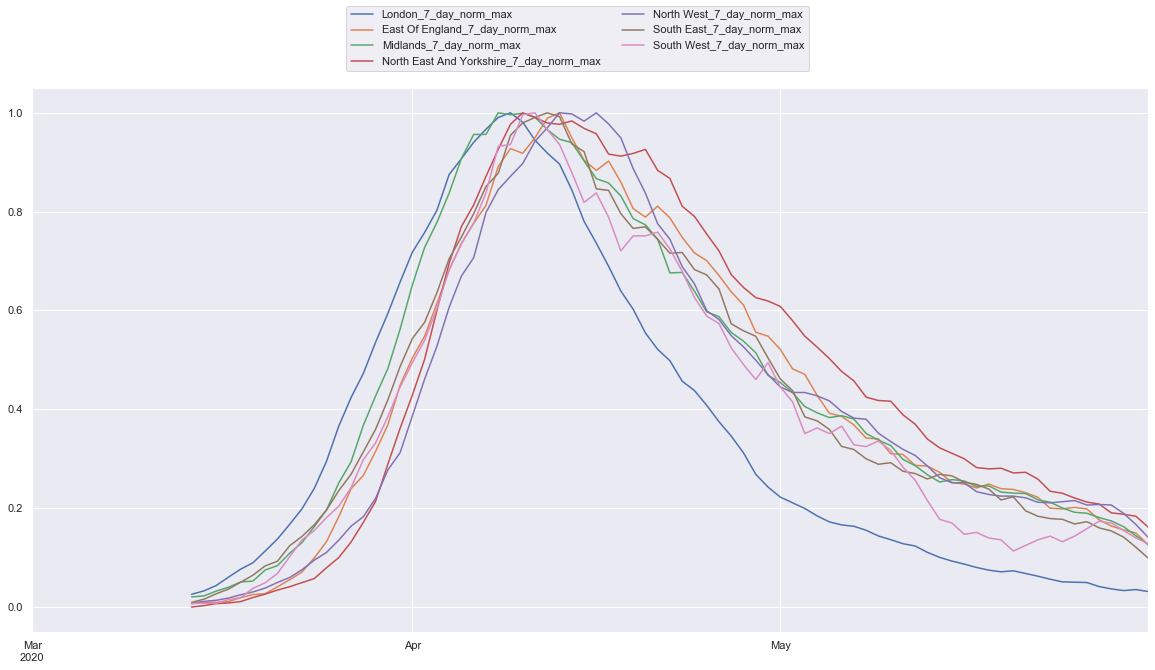

In [139]:
figure = plt.figure(figsize=(20,10))
for region in regions:
    if region == "England":
        continue
    death_by_region_df[region+"_7_day_norm_max"].plot()
    max_val = death_by_region_df[region].idxmax()
    print(f"{region} peak: {max_val}")
figure.legend(ncol=2, loc='upper center')
    

## Daily deaths normalised to population

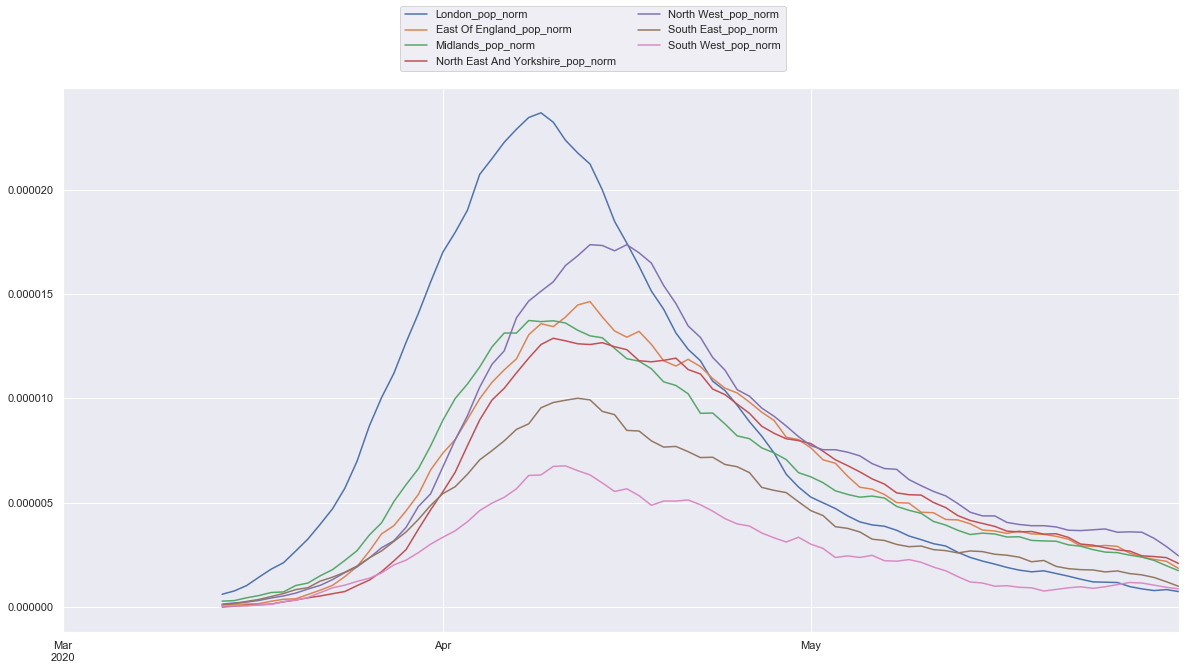

In [143]:
plot_all(death_by_region_df, "_pop_norm")

## Daily deaths normalised to population density 

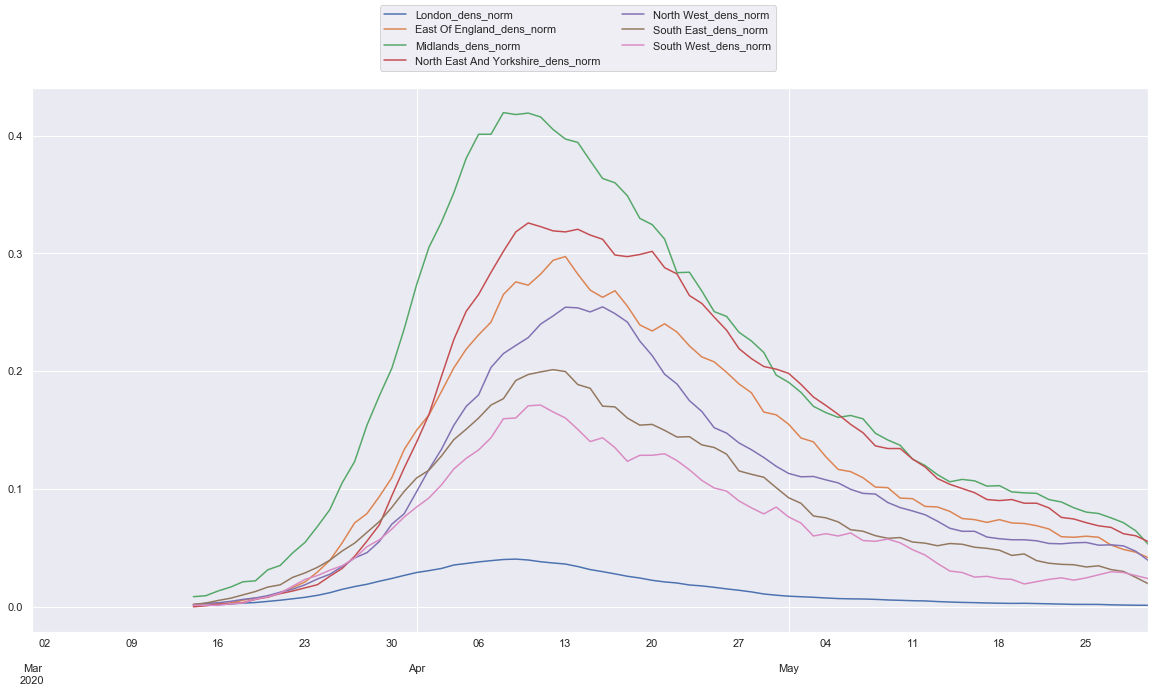

In [127]:
plot_all(death_by_region_df, "_dens_norm")

## 7 day moving average of daily deaths

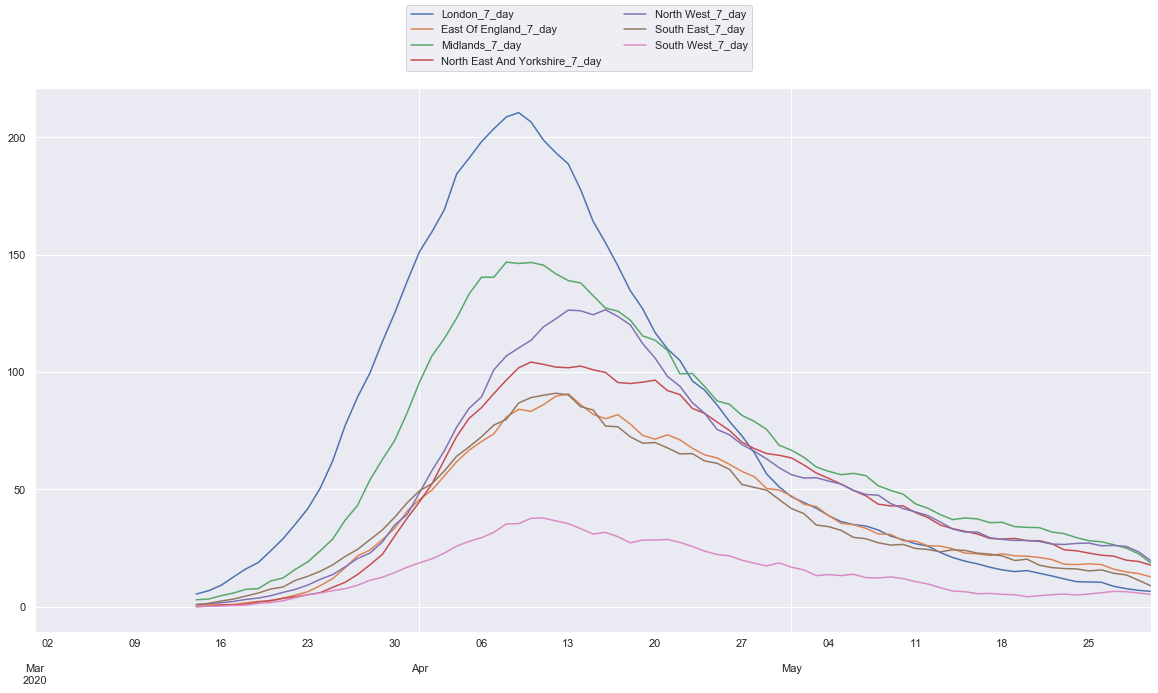

In [128]:
plot_all(death_by_region_df, "_7_day")

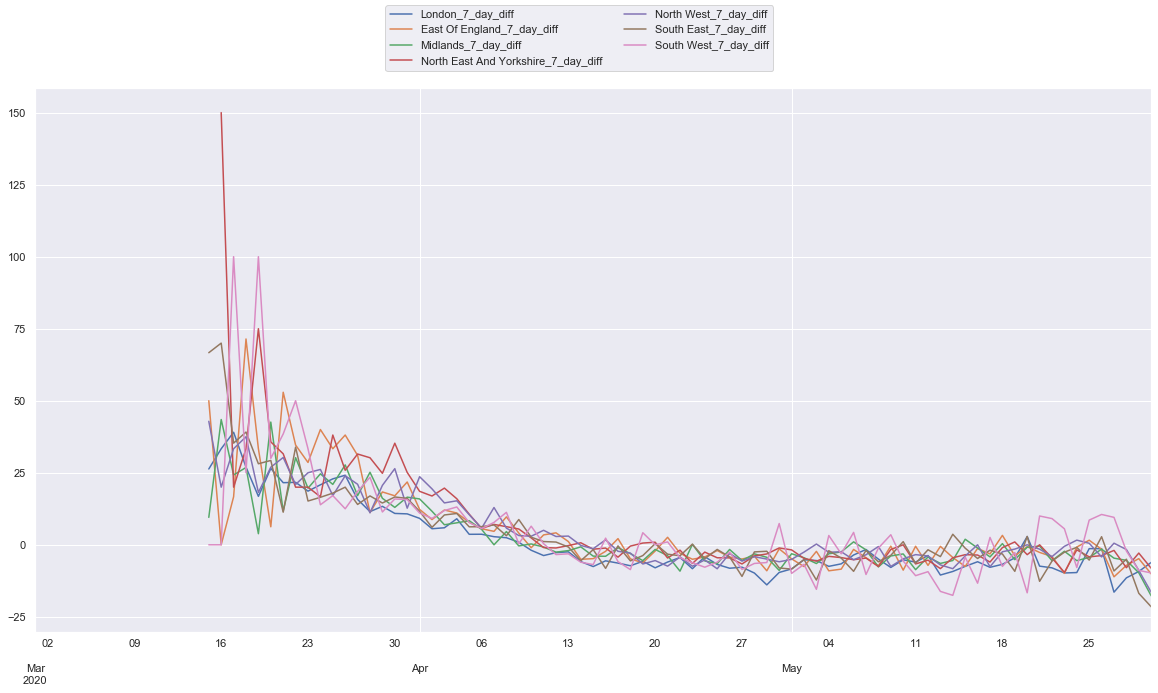

In [130]:
plot_all(death_by_region_df, "_7_day_diff")

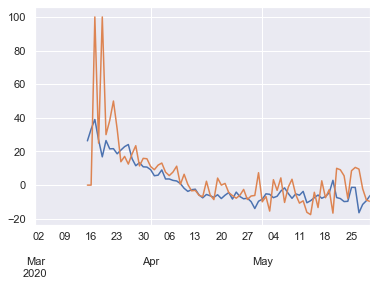

In [131]:
death_by_region_df["London_7_day_diff"].plot()
death_by_region_df["South West_7_day_diff"].plot()